# Threat Detection System

### About the data
To cite the dataset please reference it as “Stratosphere Laboratory. A labeled dataset with malicious and benign IoT network traffic. January 22th. Agustin Parmisano, Sebastian Garcia, Maria Jose Erquiaga. https://www.stratosphereips.org/datasets-iot23



This dataset includes labels that explain the linkages between flows connected with harmful or possibly malicious activity to provide network malware researchers and analysts with more thorough information. These labels were painstakingly created at the Stratosphere labs using malware capture analysis.

We present a concise explanation of the labels used for the identification of malicious flows, based on manual network analysis, below:

Attack: This label signifies the occurrence of an attack originating from an infected device directed towards another host. Any flow that endeavors to exploit a vulnerable service, discerned through payload and behavioral analysis, falls under this classification. Examples include brute force attempts on telnet logins or header-based command injections in GET requests.

Benign: The "Benign" label denotes connections where no suspicious or malicious activities have been detected.

C&C (Command and Control): This label indicates that the infected device has established a connection with a Command and Control server. This observation is rooted in the periodic nature of connections or activities such as binary downloads or the exchange of IRC-like or decoded commands.

DDoS (Distributed Denial of Service): "DDoS" is assigned when the infected device is actively involved in a Distributed Denial of Service attack, identifiable by the volume of flows directed towards a single IP address.

FileDownload: This label signifies that a file is being downloaded to the infected device. It is determined by examining connections with response bytes exceeding a specified threshold (typically 3KB or 5KB), often in conjunction with known suspicious destination ports or IPs associated with Command and Control servers.

HeartBeat: "HeartBeat" designates connections where packets serve the purpose of tracking the infected host by the Command and Control server. Such connections are identified through response bytes below a certain threshold (typically 1B) and exhibit periodic similarities. This is often associated with known suspicious destination ports or IPs linked to Command and Control servers.

Mirai: This label is applied when connections exhibit characteristics resembling those of the Mirai botnet, based on patterns consistent with common Mirai attack profiles.

Okiru: Similar to "Mirai," the "Okiru" label is assigned to connections displaying characteristics of the Okiru botnet. The parameters for this label are the same as for Mirai, but Okiru is a less prevalent botnet family.

PartOfAHorizontalPortScan: This label is employed when connections are involved in a horizontal port scan aimed at gathering information for potential subsequent attacks. The labeling decision hinges on patterns such as shared ports, similar transmitted byte counts, and multiple distinct destination IPs among the connections.

Torii: The "Torii" label is used when connections exhibit traits indicative of the Torii botnet, with labeling criteria similar to those used for Mirai, albeit in the context of a less common botnet family.

|Field Name	| Description| Type|
|-----------|-----------|------|
|ts|The timestamp of the connection event.	|time|
|uid	|A unique identifier for the connection.	|string|
|id.orig_h	|The source IP address.	|addr|
|id.orig_p	|The source port.	|port|
|id.resp_h	|The destination IP address.	|addr|
|id.resp_p	|The destination port.	|port|
|proto	|The network protocol used (e.g., 'tcp').	|enum|
|service|The service associated with the connection.	|string|
|duration	|The duration of the connection.	|interval|
|orig_bytes	|The number of bytes sent from the source to the destination.	|count|
|resp_bytes	|The number of bytes sent from the destination to the source.	|count|
|conn_state	|The state of the connection.	|string|
|local_orig	|Indicates whether the connection is considered local or not.	|bool|
|local_resp	|Indicates whether the connection is considered local or not.	|bool|
|missed_bytes|The number of missed bytes in the connection.	|count|
|history	|A history of connection states.	|string|
|orig_pkts	|The number of packets sent from the source to the destination.	|count|
|orig_ip_bytes	|The number of IP bytes sent from the source to the destination.	|count|
|resp_pkts	|The number of packets sent from the destination to the source.	|count|
|resp_ip_bytes	|The number of IP bytes sent from the destination to the source.	|count|
|tunnel_parents	|Indicates if this connection is part of a tunnel.	|set[string]|
|label	|A label associated with the connection (e.g., 'Malicious' or 'Benign').	|string|
|detailed-label	|A more detailed description or label for the connection.	|string|

### Importing the Dataset and Library dependencies


In [1]:


# Importing all the dependencies needed on the projects 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Importing Libraries needed for Building Neural network 
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

The code you provided is an import statement block in Python. It's bringing in various libraries and functions that are likely used for data analysis and machine learning tasks. Here's a breakdown of the different sections:

1. General-Purpose Libraries:

numpy (np): Provides numerical computing capabilities, arrays, and mathematical functions.
pandas (pd): Used for data manipulation, analysis, and I/O operations, especially for working with CSV files.
tensorflow (tf): A powerful library for deep learning and machine learning.
matplotlib.pyplot (plt): Used for creating visualizations like charts and plots.
seaborn (sns): Built on top of matplotlib, providing a higher-level interface for creating statistical data visualizations.
preprocessing and decomposition from sklearn: Modules for data preprocessing (e.g., scaling) and dimensionality reduction techniques (e.g., PCA, TSNE) that can be useful for preparing data for machine learning models.
time: Provides functions for measuring time intervals, which could be used for performance profiling.
2. Classification Libraries:

Various classifiers from sklearn.linear_model, sklearn.svm, sklearn.neighbors, sklearn.tree, and sklearn.ensemble: These libraries offer a wide range of classification algorithms, including Logistic Regression, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Decision Trees, Random Forests, Gradient Boosting, and XGBoost.
collections: Provides data structures like Counter that might be helpful for analyzing data distributions.
3. Other Libraries:

train_test_split from sklearn.model_selection: Used to split data into training and testing sets for model evaluation.
make_pipeline and imbalanced_make_pipeline: Functions for creating pipelines that combine data preprocessing and model fitting steps. imbalanced_make_pipeline is specifically designed for handling imbalanced datasets (where some classes have much fewer samples than others).
SMOTE and NearMiss from imblearn.over_sampling and imblearn.under_sampling: Techniques for addressing imbalanced datasets by oversampling (creating synthetic data points for minority classes) or undersampling (removing data points from majority classes).
classification_report_imbalanced from imblearn.metrics: Provides a classification report that considers class imbalance.
precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report from sklearn.metrics: Functions for evaluating the performance of machine learning models.
KFold and StratifiedKFold from sklearn.model_selection: Techniques for implementing cross-validation to assess model performance more robustly.
warnings: Used to suppress warnings that might clutter the output.
4. Neural Network Libraries:

keras: A popular deep learning library.
backend (K) from keras: Provides access to the underlying computational backend (e.g., TensorFlow).
Sequential and Dense from keras.models and keras.layers: Used to build sequential neural network architectures with dense (fully connected) layers.
Activation from keras.layers.core: Functions for applying activation functions to layers in a neural network.
Adam from keras.optimizers: An optimizer used to train neural networks.
categorical_crossentropy from keras.metrics: A loss function commonly used for multi-class classification problems.
In summary, this code sets the stage for data analysis, machine learning model building (including both classical and deep learning approaches), and model evaluation. By understanding the purpose of these libraries, you can gain a better understanding of the overall project's goals.

### Loading data from the file

In [2]:
original_df = pd.read_csv(r'C:\Users\pbrin\Downloads\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv', delimiter="|")

This line of code is loading the data from a CSV file assumed to contain information about web threats into a DataFrame object (tabular data structure) in Python for further analysis. If the data loading is successful, original_df will now hold the table of data from the CSV file.

### Generating a random sample of 200000 rows of data

In [3]:
file = original_df

file.head(5)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [4]:
file

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


## Data Preprocessing

In [5]:
# Replace hyphens ('-') with pandas' NA values for better handling of missing or undefined data.
file.replace('-', pd.NA, inplace=True)

file.head(10)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,<NA>,2.999051,0,...,<NA>,0.0,S,3.0,180.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,<NA>,2.998796,0,...,<NA>,0.0,S,3.0,180.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
5,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
6,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,<NA>,2.998804,0,...,<NA>,0.0,S,3.0,180.0,0.0,0.0,<NA>,Benign,<NA>
7,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Benign,<NA>
8,1.525880e+09,CDtZ4so7bHKpIeCmi,192.168.100.103,58525.0,177.75.151.125,23.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan
9,1.525880e+09,Cj9lm7amKnWiNDh9c,192.168.100.103,43849.0,94.145.70.119,8080.0,tcp,<NA>,<NA>,<NA>,...,<NA>,0.0,S,1.0,60.0,0.0,0.0,<NA>,Malicious,PartOfAHorizontalPortScan


The code helps you clean your data by replacing hyphens with a standard missing data representation and then gives you a quick glimpse into the initial rows to see if the replacement worked correctly

### Handling Null values

In [6]:
null_values = file.isnull().sum()
print(null_values)

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service           1005507
duration           796300
orig_bytes         796300
resp_bytes         796300
conn_state              0
local_orig        1008748
local_resp        1008748
missed_bytes            0
history             17421
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents    1008748
label                   0
detailed-label     469275
dtype: int64


### Barchart

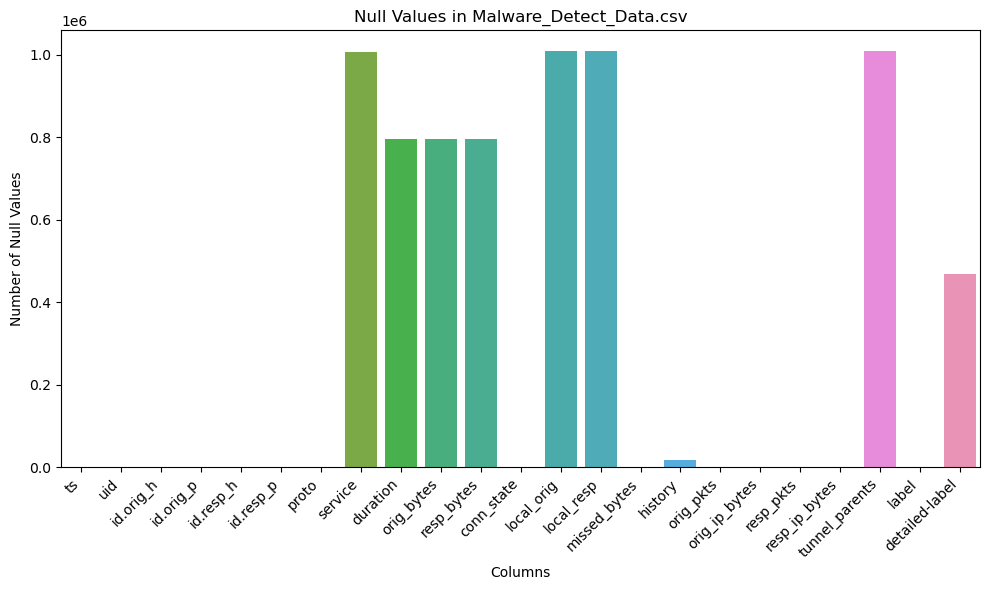

In [7]:
# Plotting null values using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Malware_Detect_Data.csv')
plt.tight_layout()
plt.show()

### Heatmap

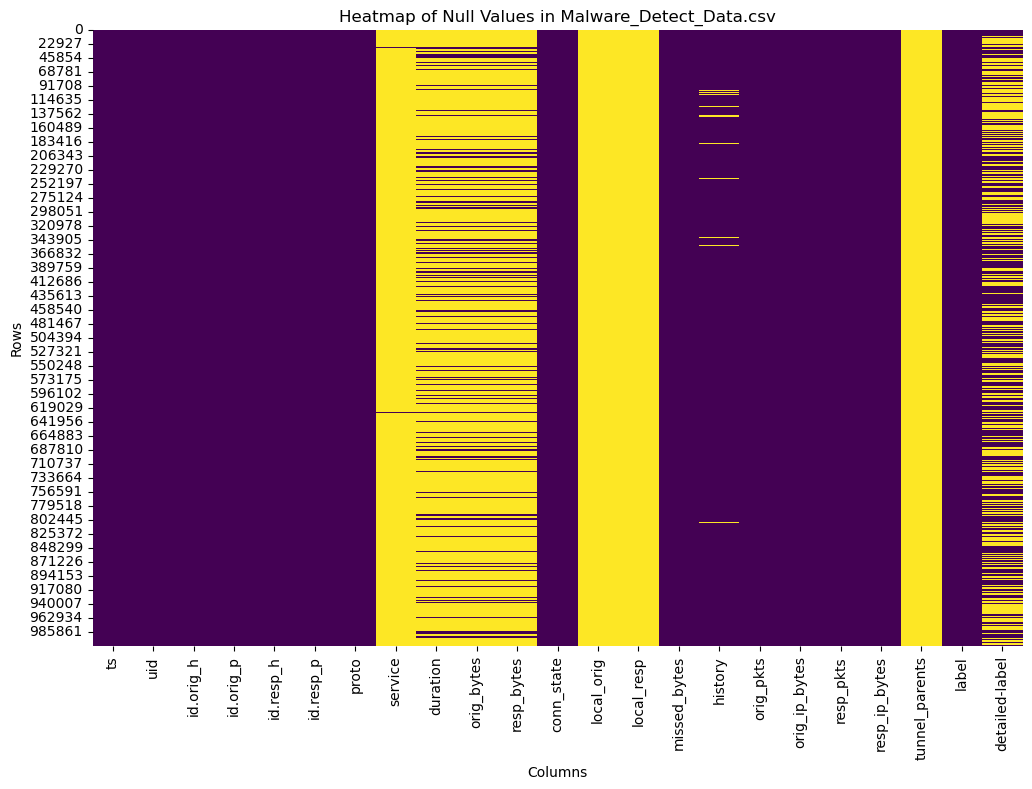

In [8]:
# Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

This visualization helps you identify columns or rows with a high concentration of missing data, allowing you to decide how to handle them (e.g., impute missing values, remove rows/columns

#### Calculating null value as a percentage

In [9]:
null_values = file.isnull().sum()

null_percentage = (null_values / len(file)) * 100

columns_with_null = null_percentage[null_percentage > 0]

print("Columns with Null Values (Percentage):")
print(columns_with_null)

Columns with Null Values (Percentage):
service            99.678711
duration           78.939438
orig_bytes         78.939438
resp_bytes         78.939438
local_orig        100.000000
local_resp        100.000000
history             1.726992
tunnel_parents    100.000000
detailed-label     46.520538
dtype: float64


The code you provided calculates the percentage of missing values in each column of your DataFrame and then identifies which columns have at least one missing value

#### Dropping column with null values that cannot be replaced

In [10]:
# droping columns with null values
file.drop(['service','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents'],axis=1,inplace=True)

The code you provided drops specific columns from your DataFrame file that are known to contain missing values

#### After dropping columns

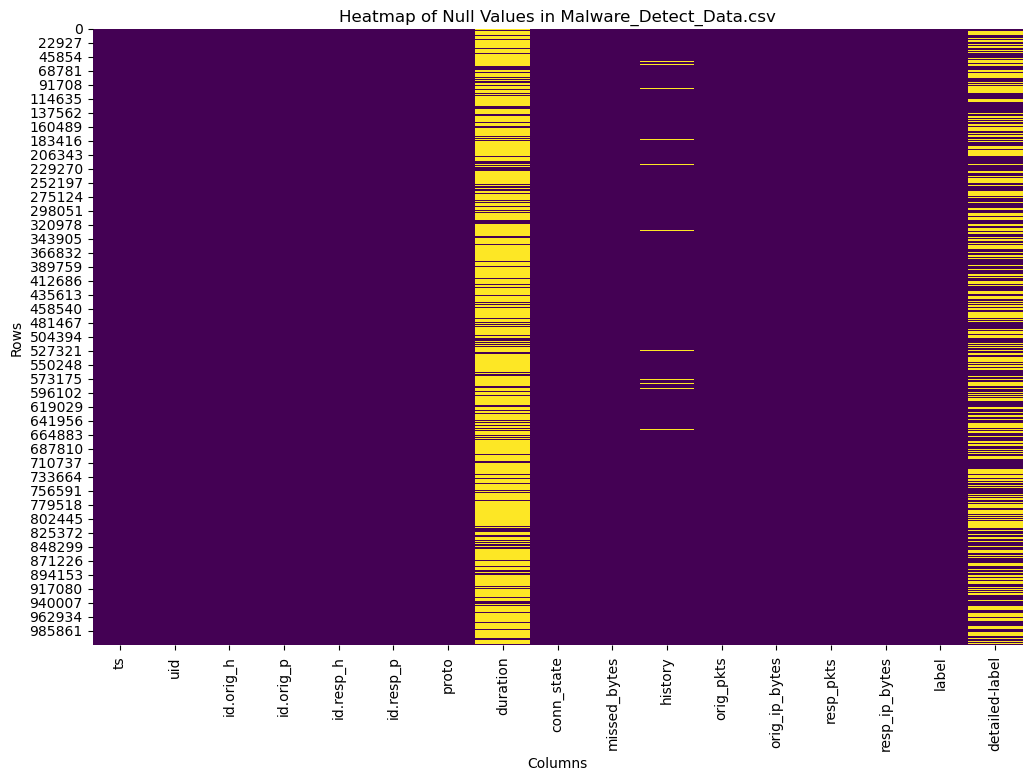

In [11]:
#Generate a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

#### Label encoding in duration

In [12]:
label_encoder = preprocessing.LabelEncoder()
#label encode label
file['label']= label_encoder.fit_transform(file['label'])
file.head()
file['duration'] = pd.to_numeric(file['duration'])

Label encoding is a common technique used to convert categorical data (text labels) into numerical data for machine learning algorithms that typically work better with numerical features. The LabelEncoder assigns a unique integer value to each distinct category in the "label" column. However, it's important to note that label encoding does not necessarily preserve the inherent order or relationship between the categories. For example, a label encoded "1" might not necessarily signify "more severe" than a label encoded "0".

#### Correlation matrix

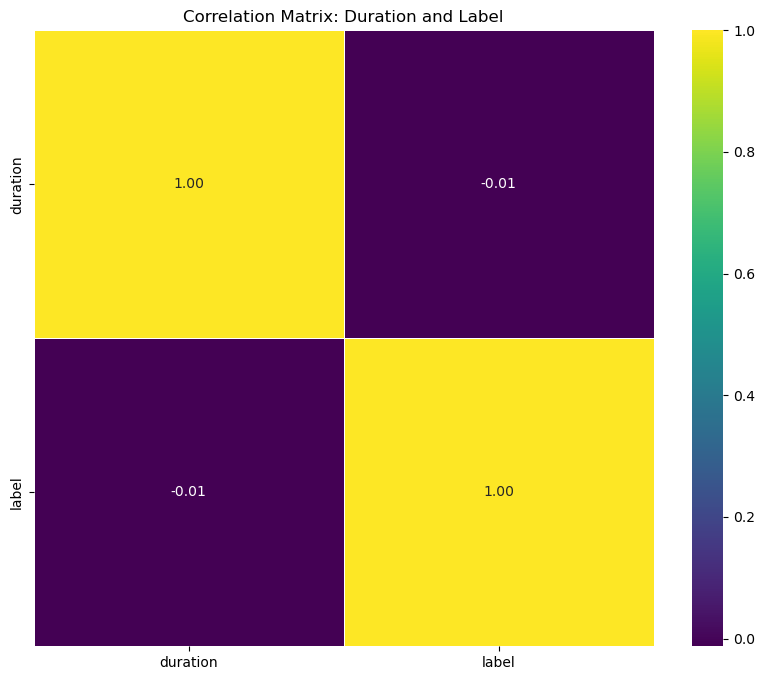

In [13]:
selected_columns = ['duration', 'label']

# Create a DataFrame with only the selected columns
selected_file = file[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_file.corr()

plt.figure(figsize=(10, 8))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: Duration and Label')

plt.show()


This snippet of code check the correlation between the label and duration columns.

#### Dropping the duration column

In [14]:
file.drop(['duration'],axis=1,inplace=True)

#### Value count of the history columns

In [15]:
file['history'].value_counts()

history
S           569605
D           401606
Dd            6569
Sr            4346
ShAdDafF      2744
             ...  
ShADdfR          1
FfA              1
ShAFafR          1
HaDdAFTf         1
^hADr            1
Name: count, Length: 125, dtype: int64

In [16]:
#removing null values
file.dropna(subset=['history'], inplace=True)

#### Label Encoding of the history columns 

In [17]:
# lael encoding of the connection states's history
label_encoder = preprocessing.LabelEncoder()
file['history']= label_encoder.fit_transform(file['history'])
file['history'].unique()

array([ 21, 117,   1,   3,  20, 106, 113, 108,  54, 124,  33,  24,  52,
        27,  80, 115,  36,  38,  61,  71,  77,  25,  76,  22, 102,  31,
        74,  68,  32,  26,  34,  93,  30, 111,  94, 110,  95,  75,  96,
         2,  40,  99,  82,  53,  39,  59,  28,  55,  66, 104,  87,  83,
        49,  91,  23,  10,  97,  37, 100,  15,  29,  79,  65,  78,  88,
       105,  60,  86,  44,  51, 116,   4,  35, 109, 101,  63,  92,  73,
        14,  72,  17,  81,   0,  69,  70,  41,   8,   5,  13,   6,  56,
        12,  89,  47, 122,  43,  64, 114, 107,  18, 118,  45,  98,  62,
        48,  90,   7,  57,  84,   9, 112,  67, 103,  85,  11,  16,  19,
        46, 121, 119,  58, 120,  50,  42, 123])

#### Counting the value of the detailed-label

In [18]:
file['detailed-label'].value_counts()

detailed-label
PartOfAHorizontalPortScan    539465
C&C                               8
Name: count, dtype: int64

In [19]:
file.drop(file[file['detailed-label'] == 'C&C'].index, inplace = True)
file['detailed-label'].value_counts()

detailed-label
PartOfAHorizontalPortScan    539465
Name: count, dtype: int64

#### Filling Misssing value with na

In [20]:
file['detailed-label'].fillna('n', inplace=True)

#### One hot Encoding to get the detailed label as an integer

In [21]:
#onehot encode
onehot = pd.get_dummies(file['detailed-label'])
file= file.join(onehot)
file.head()
file.drop(['detailed-label'],axis=1,inplace=True)
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,21,3.0,180.0,0.0,0.0,1,True,False
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,21,3.0,180.0,0.0,0.0,1,True,False
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False


#### Checking for Missing Values in the data

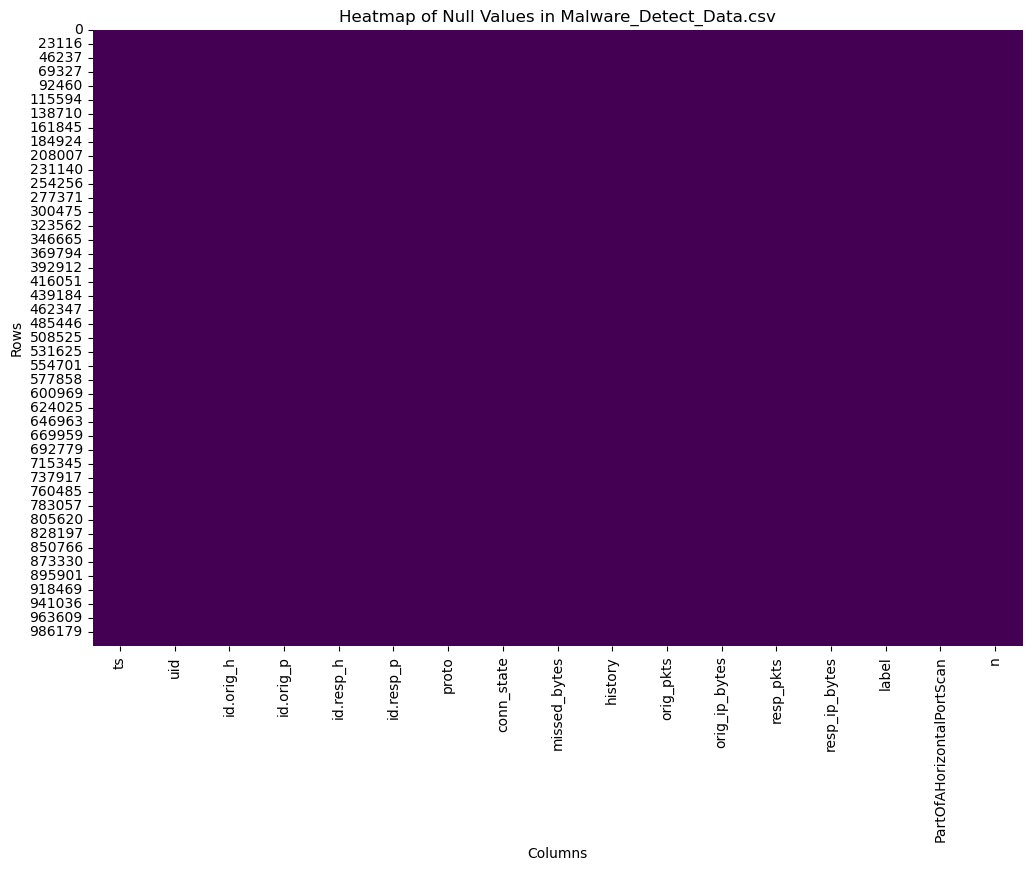

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(file.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Null Values in Malware_Detect_Data.csv')
plt.show()

In [23]:
# convert timestamp to numeric
file['ts'] = pd.to_numeric(file['ts'])
file['ts'].mean()

1526076091.919579

The code provided attempts to convert the "ts" column in your DataFrame file to a numeric data type and then calculates the mean of the converted values. 

In [24]:
#value count of the unique indentifer of the connection
file['uid'].value_counts()

uid
CUmrqr4svHuSXJy5z7    1
CvrMmvZpSk71vraDb     1
COuux34roXQIVYOWj4    1
CKsqtbPB7m88GydZ      1
CG2O0q3krI5T9hO1Ja    1
                     ..
Co2hMD2jJgN0VoXRn6    1
CewI0w3kNthzybSWL6    1
CHb8Nr1Z4ZsPxscQhh    1
Ch17RY3BsOtdJ27TSl    1
CoOjVZ1zw3pWf7a9n5    1
Name: count, Length: 991319, dtype: int64

In [25]:
#Encoding the unique indentifier of the connection
file['uid']= label_encoder.fit_transform(file['uid'])
# types of timestamp
file['uid'].value_counts()

uid
492942    1
925181    1
399745    1
335601    1
257778    1
         ..
800374    1
655125    1
283014    1
688355    1
806028    1
Name: count, Length: 991319, dtype: int64

In [26]:
#count of the Source IP address
file['id.orig_h'].value_counts()

id.orig_h
192.168.100.103    991053
70.45.29.240           10
210.206.154.134         9
201.81.12.29            7
81.130.230.46           6
                    ...  
108.127.248.61          1
70.0.63.87              1
108.103.32.162          1
70.12.137.129           1
255.176.39.22           1
Name: count, Length: 215, dtype: int64

In [27]:
#label encoding of the source Ip address
file['id.orig_h']= label_encoder.fit_transform(file['id.orig_h'])
# types of timestamp
file['id.orig_h'].value_counts()

id.orig_h
138    991053
194        10
147         9
144         7
204         6
        ...  
35          1
184         1
12          1
185         1
161         1
Name: count, Length: 215, dtype: int64

In [28]:
#value counts of the destination IP address
file['id.resp_h'].value_counts()

id.resp_h
147.231.100.5      4313
213.239.154.12     1428
37.187.104.44      1408
89.221.214.130     1402
192.168.100.103     266
                   ... 
10.105.66.170         1
165.6.88.28           1
251.245.27.164        1
48.19.58.31           1
23.70.168.160         1
Name: count, Length: 597099, dtype: int64

In [29]:
#Label Encoding of the destination IP address
file['id.resp_h']= label_encoder.fit_transform(file['id.resp_h'])
file['id.resp_h'].value_counts()

id.resp_h
131947    4313
316871    1428
426978    1408
567899    1402
256474     266
          ... 
2718         1
181344       1
394323       1
457606       1
354652       1
Name: count, Length: 597099, dtype: int64

In [30]:
#count of the destination port
file['id.resp_p'].value_counts()


id.resp_p
23.0       271561
8080.0     135382
2323.0      88184
9527.0      44338
123.0        8553
            ...  
9337.0          1
25384.0         1
29498.0         1
60442.0         1
688.0           1
Name: count, Length: 65424, dtype: int64

In [31]:
#lael encoding of the destination port
file['id.resp_p']= label_encoder.fit_transform(file['id.resp_p'])
file['id.resp_p'].value_counts()

id.resp_p
22       271561
8055     135382
2316      88184
9501      44338
121        8553
          ...  
9311          1
25336         1
29447         1
60341         1
686           1
Name: count, Length: 65424, dtype: int64

In [32]:
#count of the source port

file['id.orig_p'].value_counts()

id.orig_p
43763.0    399642
123.0        8551
23.0          158
45334.0        55
43027.0        55
            ...  
6644.0          1
56879.0         1
49881.0         1
8304.0          1
65394.0         1
Name: count, Length: 28239, dtype: int64

In [33]:
# Label encoding of the source port.
file['id.orig_p']= label_encoder.fit_transform(file['id.orig_p'])
file['id.orig_p'].value_counts()

id.orig_p
11006    399642
3          8551
0           158
12577        55
10270        55
          ...  
10            1
24117         1
17122         1
11            1
28238         1
Name: count, Length: 28239, dtype: int64

In [34]:
# The count of the various protocol types
file['proto'].value_counts()

proto
tcp    583134
udp    408185
Name: count, dtype: int64

In [35]:
#one hot encoding for the protocol
onehot = pd.get_dummies(file['proto'])
file = file.join(onehot)
file.head()
file.drop(['proto'],axis=1,inplace=True)
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
0,1.525880e+09,492942,138,18764,501740,22,S0,0.0,21,3.0,180.0,0.0,0.0,1,True,False,True,False
1,1.525880e+09,275629,138,23543,496866,22,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False,True,False
2,1.525880e+09,52484,138,8346,36215,22,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False,True,False
3,1.525880e+09,219255,138,28141,88035,22,S0,0.0,21,3.0,180.0,0.0,0.0,1,True,False,True,False
4,1.525880e+09,314735,138,11544,576054,22,S0,0.0,21,1.0,60.0,0.0,0.0,1,True,False,True,False


In [36]:
# The value count of the various state of connection
file['conn_state'].value_counts()

conn_state
S0        971221
SF         13881
REJ         4346
RSTR        1465
RSTOS0       197
RSTRH         66
RSTO          47
S2            40
SH            29
S1            27
Name: count, dtype: int64

In [37]:
#label encode conn_state
file['conn_state']= label_encoder.fit_transform(file['conn_state'])
file['conn_state'].value_counts()

conn_state
5    971221
8     13881
0      4346
3      1465
2       197
4        66
1        47
7        40
9        29
6        27
Name: count, dtype: int64

In [38]:
# The count of the nuber of missing in the connection 
file['missed_bytes'].value_counts()

missed_bytes
0.0    991319
Name: count, dtype: int64

In [39]:
#drop column
file.drop(['missed_bytes'],axis=1,inplace=True)

In [40]:
# The count of the various packets from the souce to the destination
file['orig_pkts'].value_counts()

orig_pkts
1.0     790909
3.0     191211
5.0       2166
4.0        893
2.0        846
8.0        555
28.0       416
29.0       320
27.0       292
24.0       271
12.0       243
11.0       238
26.0       237
23.0       236
25.0       210
15.0       202
13.0       189
9.0        179
22.0       131
7.0        131
18.0       131
30.0       128
19.0       118
6.0        109
45.0       101
10.0        97
14.0        93
21.0        92
20.0        81
31.0        68
44.0        64
16.0        56
0.0         45
17.0        31
32.0        31
34.0        25
35.0        22
33.0        21
37.0        20
43.0        20
38.0        17
36.0        16
46.0        14
39.0        11
40.0         9
41.0         7
42.0         4
47.0         4
50.0         3
48.0         2
51.0         1
49.0         1
52.0         1
60.0         1
Name: count, dtype: int64

In [41]:
# COnverting the packet columns tonumeric datatype
file['orig_pkts'] = pd.to_numeric(file['orig_pkts'])

In [42]:
#  Converting the Number of byte sent from source destination to numeric
file['orig_ip_bytes'] = pd.to_numeric(file['orig_ip_bytes'])

In [43]:
# Converting the number of packetsent to  numeriic
file['resp_pkts'] = pd.to_numeric(file['resp_pkts'])


In [44]:
# Converting number of byte sent from destination to source to numeric
file['resp_ip_bytes'] = pd.to_numeric(file['resp_ip_bytes'])

In [45]:
# Count of the label 1 means Malicious, 0 means Benign
file['label'].value_counts()

label
1    539465
0    451854
Name: count, dtype: int64

In [46]:
#label encode label columns
file['label']= label_encoder.fit_transform(file['label'])
file.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
0,1.525880e+09,492942,138,18764,501740,22,5,21,3.0,180.0,0.0,0.0,1,True,False,True,False
1,1.525880e+09,275629,138,23543,496866,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False
2,1.525880e+09,52484,138,8346,36215,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False
3,1.525880e+09,219255,138,28141,88035,22,5,21,3.0,180.0,0.0,0.0,1,True,False,True,False
4,1.525880e+09,314735,138,11544,576054,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False


# Model Selection

### Train Test Split

In [47]:


from sklearn.model_selection import train_test_split

X = file.drop('label', axis=1)
y = file['label']

# Split the DataFrame into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.head()
y_train.value_counts()


label
1    431648
0    361407
Name: count, dtype: int64

The code provided imports a library and splits your data into training and testing sets. Here's a breakdown of what each part does:

Importing train_test_split from sklearn.model_selection:

This line imports the train_test_split function from the sklearn.model_selection module. This function is commonly used in machine learning to split a dataset into training and testing sets.
Splitting Data into X and y:

X = file.drop('label', axis=1): This line creates a new DataFrame called X that contains all columns of file except the "label" column. In machine learning, features (independent variables) are often stored in a separate DataFrame or array from the target variable (dependent variable).
y = file['label']: This line assigns the "label" column from file to a separate variable y. This variable represents the target variable that your machine learning model will try to predict.
Splitting Data Using Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): This line splits the data into training and testing sets using the train_test_split function.
X: This refers to the features DataFrame you created (X).
y: This refers to the target variable (y).
test_size=0.2: This argument specifies that 20% (0.2) of the data will be allocated to the testing set. The remaining 80% will be used for training.
random_state=42: This sets a seed for the random number generator, ensuring that you get the same split every time you run the code (assuming all other conditions are the same). This helps with reproducibility.
The result of this line is four variables:
X_train: This contains the training features.
X_test: This contains the testing features.
y_train: This contains the training target labels.
y_test: This contains the testing target labels.
Displaying Training Labels:

y_train.head(): This line displays the first few rows of the y_train DataFrame to give you an idea of the training target labels (e.g., categories or values).
y_train.value_counts(): This line displays the frequency counts of the different categories or values present in the training target labels. This can help you understand the class distribution in your training data.

In [48]:
file

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,PartOfAHorizontalPortScan,n,tcp,udp
0,1.525880e+09,492942,138,18764,501740,22,5,21,3.0,180.0,0.0,0.0,1,True,False,True,False
1,1.525880e+09,275629,138,23543,496866,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False
2,1.525880e+09,52484,138,8346,36215,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False
3,1.525880e+09,219255,138,28141,88035,22,5,21,3.0,180.0,0.0,0.0,1,True,False,True,False
4,1.525880e+09,314735,138,11544,576054,22,5,21,1.0,60.0,0.0,0.0,1,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,495921,138,11006,165793,64796,5,1,1.0,40.0,0.0,0.0,0,False,True,False,True
1008744,1.526283e+09,920719,138,11006,7220,39363,5,1,1.0,40.0,0.0,0.0,0,False,True,False,True
1008745,1.526283e+09,500965,138,11006,389185,26121,5,1,1.0,40.0,0.0,0.0,0,False,True,False,True
1008746,1.526283e+09,740291,138,11006,293498,18204,5,1,1.0,40.0,0.0,0.0,0,False,True,False,True


### Normalisation

In [49]:
from sklearn.preprocessing import Normalizer, StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

This code demonstrates how to use the StandardScaler class from the sklearn.preprocessing module in Python, typically used for preprocessing data before feeding it into a machine learning model. Let's break it down step by step:

from sklearn.preprocessing import StandardScaler: This line imports the StandardScaler class from the sklearn.preprocessing module. Scikit-learn (sklearn) is a popular machine learning library in Python, and StandardScaler is a preprocessing technique used for scaling numerical features.

scaler = StandardScaler(): This line creates an instance of the StandardScaler class. This instance will be used to scale the data.

X_train_scaled = scaler.fit_transform(X_train): Here, the fit_transform method is called on the scaler object, passing in the training data X_train. This method fits the scaler to the training data (computing the mean and standard deviation for scaling) and then transforms the training data using these computed values. The transformed data is stored in X_train_scaled.

X_test_scaled = scaler.fit_transform(X_test): Similarly, the fit_transform method is called on the same scaler object, but this time on the test data X_test. This fits the scaler to the test data and transforms it. However, it's important to note that we're fitting the scaler again using the test data, which is generally not recommended. Instead, we should only transform the test data using the scaling parameters learned from the training data. So, it's better to use transform instead of fit_transform for the test data:

python
Copy code
X_test_scaled = scaler.transform(X_test)
By doing so, we're applying the same scaling transformation learned from the training data to the test data without refitting the scaler.

Overall, this code snippet demonstrates how to scale both the training and test data using the StandardScaler in scikit-learn, which is a common preprocessing step in machine learning workflows to ensure that all features have the same scale.

In [50]:
X = X_train[:500]
y = y_train[:500]
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.9 s
PCA took 0.016 s
Truncated SVD took 0.016 s


The code provided compares the execution time of three dimensionality reduction techniques: t-SNE, PCA, and Truncated SVD. Here's a breakdown of what each part does:

Selecting a Subset of Data (Optional):

X = X_train[:500] & y = y_train[:500]: These lines create subsets containing the first 500 samples from the training features (X_train) and target labels (y_train). This step is optional and might be useful if you're dealing with very large datasets to speed up the dimensionality reduction process for demonstration purposes.
t-SNE Implementation:

t0 = time.time() & t1 = time.time(): These lines measure the execution time using Python's time module. t0 captures the starting time before the t-SNE execution, and t1 captures the ending time after execution.
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values): This line performs dimensionality reduction using t-SNE.
TSNE(n_components=2, random_state=42): This creates an instance of the TSNE class from a scikit-learn library, specifying the number of desired output dimensions (2 in this case) and setting a random seed for reproducibility.
.fit_transform(X.values): This applies t-SNE to the data in X (converted to NumPy array using .values). The result is stored in X_reduced_tsne, which contains the lower-dimensional representation of the data.
print("T-SNE took {:.2} s".format(t1 - t0)): This line calculates the elapsed time between t0 and t1 and prints a message indicating how long t-SNE took to execute for the given data subset.
PCA Implementation (Similar Structure):

The code for PCA follows a similar structure as t-SNE. It measures execution time, creates a PCA object specifying the number of components (2) and random state, applies the dimensionality reduction using .fit_transform, stores the result in X_reduced_pca, and prints the execution time.
Truncated SVD Implementation (Similar Structure):

Similar to PCA and t-SNE, this code snippet measures execution time, creates a TruncatedSVD object specifying the number of components (2), random state, and algorithm ('randomized' in this case), applies dimensionality reduction, stores the result, and prints the execution time.
Key Points:

t-SNE is generally slower than PCA and Truncated SVD because it's a more complex algorithm that aims to preserve non-linear relationships in the data.
PCA and Truncated SVD are linear dimensionality reduction techniques and might be faster for high-dimensional data.
The choice of dimensionality reduction technique depends on the characteristics of your data and the goal of the analysis. t-SNE might be preferred if you suspect non-linear relationships in your data, while PCA or Truncated SVD might be faster alternatives for linear dimensionality reduction.

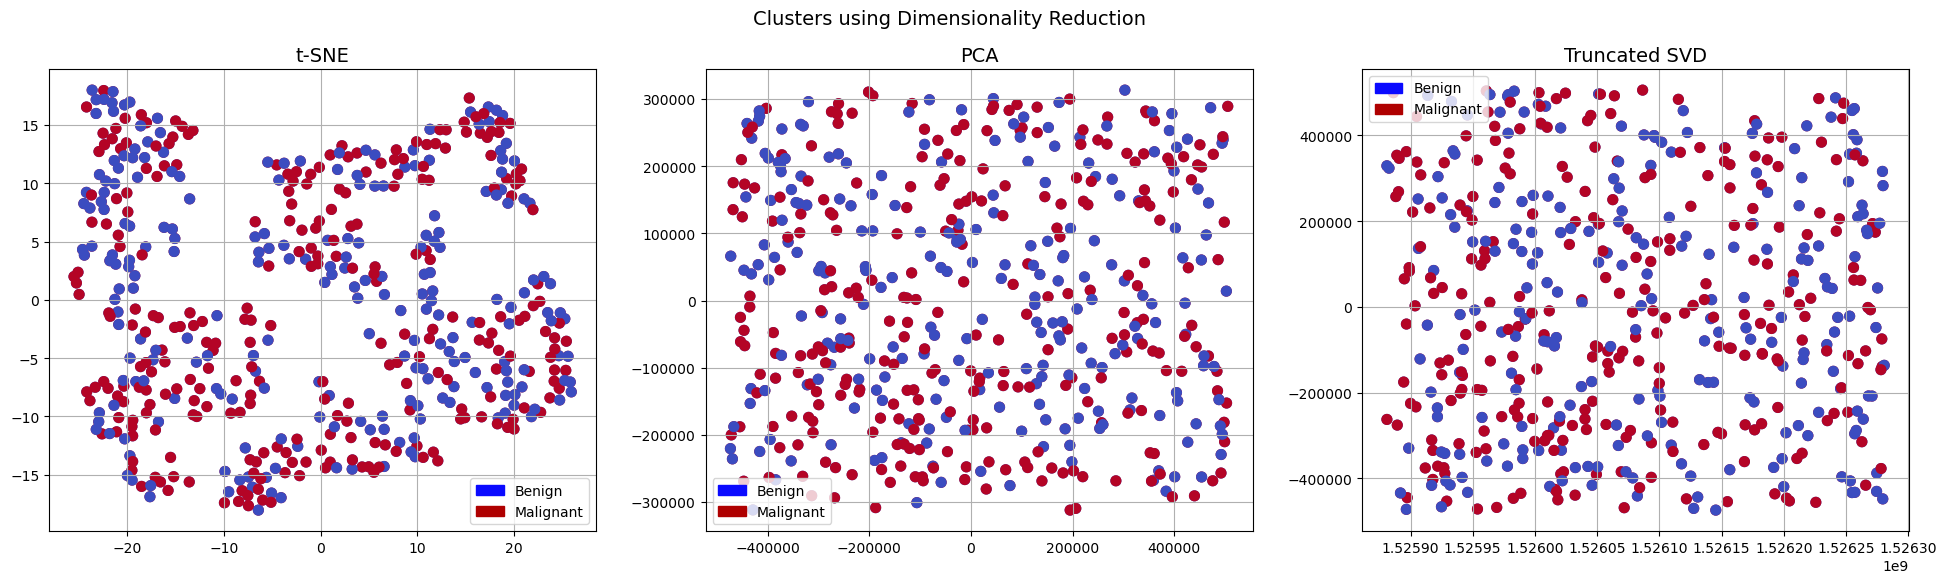

In [51]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Benign', 'Malignant']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign')
red_patch = mpatches.Patch(color='#AF0000', label='Malignant')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Benign', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Malignant', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

The code provided creates a three-panel plot to visualize the results of dimensionality reduction using t-SNE, PCA, and Truncated SVD on your data while coloring points based on the class labels ("Benign" and "Malignant"). Here's a breakdown of what each part does:

Setting Up the Plot:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6)): This line creates a figure (f) with three subplots (ax1, ax2, and ax3) arranged in a row (1 row, and 3 columns). It also sets the figure size to be 24 inches wide and 6 inches high for better visualization.
Suptitle and Legend Patches:

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14): This line adds a title above all subplots, indicating "Clusters using Dimensionality Reduction".
blue_patch = mpatches.Patch(color='#0A0AFF', label='Benign'): This line creates a colored patch object with a blue color and label "Benign" to be used in the legend.
red_patch = mpatches.Patch(color='#AF0000', label='Malignant'): This line creates a colored patch object with a red color and label "Malignant" to be used in the legend.
Scatter Plots (Similar Structure for Each Panel):

t-SNE Scatter Plot (ax1):
ax1.scatter(...): This line creates a scatter plot on the first subplot (ax1).
X_reduced_tsne[:,0], X_reduced_tsne[:,1]: This specifies the x and y coordinates for the scatter plot points, obtained from the two-dimensional representation of the data after t-SNE reduction.
c=(y == 0): This condition assigns a color based on the target label ("Benign" or "Malignant"). If y is equal to 0 (indicating "Benign"), the color is chosen from the 'coolwarm' colormap.
cmap='coolwarm': This specifies the colormap used to represent the target label. 'coolwarm' goes from blue (potentially for "Benign") to yellow/orange (potentially for "Malignant").
label='Benign': This sets the label for the "Benign" class points in the legend.
linewidths=2: This sets the width of the lines around each data point to 2 for better visibility.
Similar logic is applied to create another scatter plot on ax1 for the "Malignant" class points using the condition (y == 1).
PCA Scatter Plot (ax2): (Similar structure to t-SNE scatter plot on ax1 using X_reduced_pca for data points)
Truncated SVD Scatter Plot (ax3): (Similar structure to t-SNE and PCA scatter plots using X_reduced_svd for data points)
Adding Titles, Grid, and Legend (Similar for Each Panel):

ax1.set_title('t-SNE', fontsize=14): This sets the title for the first subplot as "t-SNE".
ax1.grid(True): This enables a grid on the subplot for better visual reference.
ax1.legend(handles=[blue_patch, red_patch]): This adds a legend to the subplot using the pre-defined colored patch objects (blue_patch and red_patch) to represent the classes.
Displaying the Plot:

plt.show(): This line displays the generated three-panel plot, allowing you to compare how the data is clustered in the lower-dimensional spaces after applying t-SNE, PCA, and Truncated SVD.

In [52]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostClassifier": GradientBoostingClassifier()
}

The code provided defines a dictionary named classifiers that contains several machine learning classification algorithms from scikit-learn. Here's a breakdown of the algorithms included:

Logistic Regression:

LogisticRegression(): This creates an instance of the LogisticRegression class. Logistic regression is a linear classification algorithm that models the relationship between features and a binary target variable (like "Benign" or "Malignant" in your case).
K-Nearest Neighbors (KNN):

KNeighborsClassifier(): This creates an instance of the KNeighborsClassifier class. KNN is a non-parametric classification algorithm that classifies a data point based on the majority vote of its k nearest neighbors in the training data.
Decision Tree Classifier:

DecisionTreeClassifier(): This creates an instance of the DecisionTreeClassifier class. Decision trees are tree-like models that learn a set of rules to classify data points based on their features.
Random Forest Classifier:

RandomForestClassifier(): This creates an instance of the RandomForestClassifier class. Random forests are ensemble learning methods that combine multiple decision trees to improve classification performance and reduce overfitting.
Gradient Boosting Classifier:

GradientBoostingClassifier(): This creates an instance of the GradientBoostingClassifier class. Gradient boosting is another ensemble learning method that builds an ensemble of weaker models (often decision trees) sequentially, each one focusing on improving the areas where the previous models made errors.
This dictionary provides a convenient way to store and reference different classification algorithms for further use in your machine learning pipeline.

In [53]:
X_train = X_train_scaled
X_test = X_test_scaled

In [54]:
pd.DataFrame(X_train, y_train).

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
label,,,,,,,,,,,,,,,,
0,1.573455,1.323028,0.006058,-1.945718,1.557706,-0.828519,-0.033488,-0.960917,-0.285393,-0.052604,-0.077710,-0.076181,-1.092865,1.092865,-1.195328,1.195328
0,-0.263205,-0.656542,0.006058,-0.265724,-0.858501,2.044707,-0.033488,-0.960917,-0.285393,-0.431316,-0.077710,-0.076181,-1.092865,1.092865,-1.195328,1.195328
1,1.101077,0.072421,0.006058,-1.382462,-1.295992,-0.423599,-0.033488,0.565916,-0.285393,-0.220920,-0.077710,-0.076181,0.915026,-0.915026,0.836590,-0.836590
1,-0.516714,-1.530025,0.006058,-1.105492,0.949357,-0.833571,-0.033488,0.565916,0.856188,1.041453,-0.077710,-0.076181,0.915026,-0.915026,0.836590,-0.836590
0,-1.122351,-1.559457,0.006058,-0.265724,-0.808340,1.282178,-0.033488,-0.960917,-0.285393,-0.431316,-0.077710,-0.076181,-1.092865,1.092865,-1.195328,1.195328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-0.825941,-0.997813,0.006058,0.794674,-0.438945,-0.833571,-0.033488,0.565916,-0.285393,-0.220920,-0.077710,-0.076181,0.915026,-0.915026,0.836590,-0.836590
0,-0.465196,-1.143329,0.006058,-0.265724,1.035046,0.785445,-0.033488,-0.960917,-0.285393,-0.431316,-0.077710,-0.076181,-1.092865,1.092865,-1.195328,1.195328
1,-1.253944,1.706981,0.006058,1.637801,-1.282398,-0.423599,-0.033488,0.565916,-0.285393,-0.220920,-0.077710,-0.076181,0.915026,-0.915026,0.836590,-0.836590


In [55]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,precision_recall_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

classifiers = {
  "LogisticRegression": LogisticRegression(),
  "KNearestNeighbors": KNeighborsClassifier(),
  "DecisionTreeClassifier": DecisionTreeClassifier(),
  "RandomForestClassifier": RandomForestClassifier(),
  "GradientBoostingClassifier": GradientBoostingClassifier()
}

# Set up cross-validation
for key, classifier in classifiers.items():
    print(f"\n**Classifier: {classifier.__class__.__name__}**")
  
    # Evaluate using cross-validation
    cv_results = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
    cross_val_accuracy = cv_results.mean() * 100
    print(f"Cross-Validation Accuracy: {round(cross_val_accuracy, 2)}%")

    # Train the classifier on the full training set
    classifier.fit(X_train, y_train)

    # Optional: Evaluate on test set
    if X_test is not None and y_test is not None:  
        y_pred = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred) * 100
        roc_auc_sc = roc_auc_score(y_test, y_pred)
        prc = precision_recall_curve(y_test, y_pred)
        print(f"Test Set Accuracy: {round(test_accuracy, 2)}%")
        print(f"Test roc-auc_score: {round(roc_auc_sc, 2)}%")
        print(f"Test precision_recall_curve: {prc}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



**Classifier: LogisticRegression**
Cross-Validation Accuracy: 100.0%
Test Set Accuracy: 100.0%
Test roc-auc_score: 1.0%
Test precision_recall_curve: (array([0.54380523, 1.        , 1.        ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90447
           1       1.00      1.00      1.00    107817

    accuracy                           1.00    198264
   macro avg       1.00      1.00      1.00    198264
weighted avg       1.00      1.00      1.00    198264

Confusion Matrix:
[[ 90447      0]
 [     0 107817]]

**Classifier: KNeighborsClassifier**
Cross-Validation Accuracy: 100.0%
Test Set Accuracy: 100.0%
Test roc-auc_score: 1.0%
Test precision_recall_curve: (array([0.54380523, 0.99999073, 1.        ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
Classification Report:
              precision    recall  f1-score   support

           0       1.00    

This process allows you to compare the performance of different classifiers on your dataset using cross-validation and, optionally, evaluate their performance on a separate test set.

# Neural Network

In [56]:
n_inputs = X_train.shape[1]

sample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [57]:
sample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 882 (3.45 KB)

 Trainable params: 882 (3.45 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
sample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
sample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25378/25378 - 24s - 947us/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 5.7806e-08
Epoch 2/20
25378/25378 - 23s - 925us/step - accuracy: 1.0000 - loss: 1.8423e-05 - val_accuracy: 1.0000 - val_loss: 2.0142e-10
Epoch 3/20
25378/25378 - 22s - 857us/step - accuracy: 1.0000 - loss: 5.5241e-11 - val_accuracy: 1.0000 - val_loss: 4.5095e-12
Epoch 4/20
25378/25378 - 22s - 859us/step - accuracy: 1.0000 - loss: 2.9555e-06 - val_accuracy: 1.0000 - val_loss: 2.2547e-12
Epoch 5/20
25378/25378 - 52s - 2ms/step - accuracy: 1.0000 - loss: 7.0508e-08 - val_accuracy: 1.0000 - val_loss: 5.2611e-12
Epoch 6/20
25378/25378 - 22s - 860us/step - accuracy: 1.0000 - loss: 8.0426e-07 - val_accuracy: 1.0000 - val_loss: 3.0063e-12
Epoch 7/20
25378/25378 - 22s - 860us/step - accuracy: 1.0000 - loss: 1.3440e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
25378/25378 - 22s - 868us/step - accuracy: 1.0000 - loss: 7.5158e-13 - val_accuracy: 1.0000 - val_loss: 0.0000e+0

In [60]:
sample_predictions =sample_model.predict(X_test, batch_size=200, verbose=0)

In [61]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [63]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 705us/step - loss: 0.0071
Epoch 2/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 769us/step - loss: 3.9794e-09
Epoch 3/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 23s 937us/step - loss: 2.1340e-10
Epoch 4/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 20s 795us/step - loss: 1.1835e-10
Epoch 5/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 22s 904us/step - loss: 8.5854e-11
Epoch 6/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 738us/step - loss: 6.4508e-11
Epoch 7/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 707us/step - loss: 5.3526e-11
Epoch 8/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 753us/step - loss: 4.6906e-11
Epoch 9/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 718us/step - loss: 4.0557e-11
Epoch 10/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 714us/step - loss: 3.7342e-11


In [64]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred.flatten().astype(int)))
print(classification_report(y_test, y_pred.flatten().astype(int)))
print(confusion_matrix(y_test, y_pred.flatten().astype(int)))



6196/6196 ━━━━━━━━━━━━━━━━━━━━ 4s 630us/step
1.0
0.999959649759916
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90447
           1       1.00      1.00      1.00    107817

    accuracy                           1.00    198264
   macro avg       1.00      1.00      1.00    198264
weighted avg       1.00      1.00      1.00    198264

[[ 90447      0]
 [     8 107809]]


In [65]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 20s 738us/step - loss: 0.0193
Epoch 2/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 757us/step - loss: 3.2473e-09
Epoch 3/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 734us/step - loss: 2.4977e-10
Epoch 4/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 762us/step - loss: 1.4337e-10
Epoch 5/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 762us/step - loss: 1.1423e-10
Epoch 6/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 20s 785us/step - loss: 8.9233e-11
Epoch 7/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 18s 726us/step - loss: 7.9537e-11
Epoch 8/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 20s 804us/step - loss: 6.9028e-11
Epoch 9/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 21s 839us/step - loss: 6.1781e-11
Epoch 10/10
24783/24783 ━━━━━━━━━━━━━━━━━━━━ 19s 769us/step - loss: 5.5510e-11


In [66]:
y_pred1 = model.predict(X_test)
print(roc_auc_score(y_test, y_pred1))


6196/6196 ━━━━━━━━━━━━━━━━━━━━ 5s 729us/step
0.9999999999999999


The best performing model are the KNNs and The Convoluted Neural network

In [67]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [68]:
# saving the model 
import pickle 
pickle_out = open("classifier1.pkl", mode = "wb") 
pickle.dump(KNN, pickle_out) 
pickle_out.close()

In [69]:
# saving the model 

model.save('model1.h5')

In [85]:
y = pd.DataFrame(X_test)

In [90]:
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.750366,0.156207,0.005991,-0.476990,-0.166446,-0.834095,-0.032922,0.571018,0.851025,1.038421,-0.077507,-0.07666,0.915911,-0.915911,0.836894,-0.836894
1,-0.859870,-1.354359,0.005991,0.710557,0.949797,-0.834095,-0.032922,0.571018,0.851025,1.038421,-0.077507,-0.07666,0.915911,-0.915911,0.836894,-0.836894
2,0.670735,0.248917,0.005991,-0.268330,-1.390218,0.894956,-0.032922,-0.965131,-0.288114,-0.434760,-0.077507,-0.07666,-1.091809,1.091809,-1.194894,1.194894
3,-1.495946,-0.960272,0.005991,-0.268330,-0.163590,0.855100,-0.032922,-0.965131,-0.288114,-0.434760,-0.077507,-0.07666,-1.091809,1.091809,-1.194894,1.194894
4,-1.048064,-1.489193,0.005991,-1.555399,0.725331,-0.423104,-0.032922,0.571018,0.851025,1.038421,-0.077507,-0.07666,0.915911,-0.915911,0.836894,-0.836894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198259,-1.007366,-1.161209,0.005991,1.808045,-0.208551,-0.834095,-0.032922,0.571018,0.851025,1.038421,-0.077507,-0.07666,0.915911,-0.915911,0.836894,-0.836894
198260,1.516897,1.165836,0.005991,-0.386932,1.539552,-0.349122,-0.032922,0.571018,-0.288114,-0.224306,-0.077507,-0.07666,0.915911,-0.915911,0.836894,-0.836894
198261,1.181837,1.003026,0.005991,-0.268330,-0.690530,-0.669095,-0.032922,-0.965131,-0.288114,-0.434760,-0.077507,-0.07666,-1.091809,1.091809,-1.194894,1.194894
198262,1.674459,0.328928,0.005991,-0.268330,-0.461938,0.466927,-0.032922,-0.965131,-0.288114,-0.434760,-0.077507,-0.07666,-1.091809,1.091809,-1.194894,1.194894


In [89]:
y.to_csv("csc.csv")